# Understanding Email Campaign Performance Using SQL: A Guide for Campaign Analysts

#### 🧑‍🏫 Author: [Nhi Yen](https://www.linkedin.com/in/yennhi95zz/)
##### 💡I write about Machine Learning on [Medium](https://medium.com/@yennhi95zz) || [Github](https://github.com/yennhi95zz) || [Kaggle](https://www.kaggle.com/nhiyen/code) || [Linkedin](https://www.linkedin.com/in/yennhi95zz/). If you found this article interesting, your support by giving me ⭐ will help me spread the knowledge to others.

## Introduction

In today's digital age, email marketing remains an essential tool for businesses to reach and engage with their customers. As a campaign analyst, it's crucial to understand how email campaigns are performing, and SQL can be a powerful tool to analyze email performance data.

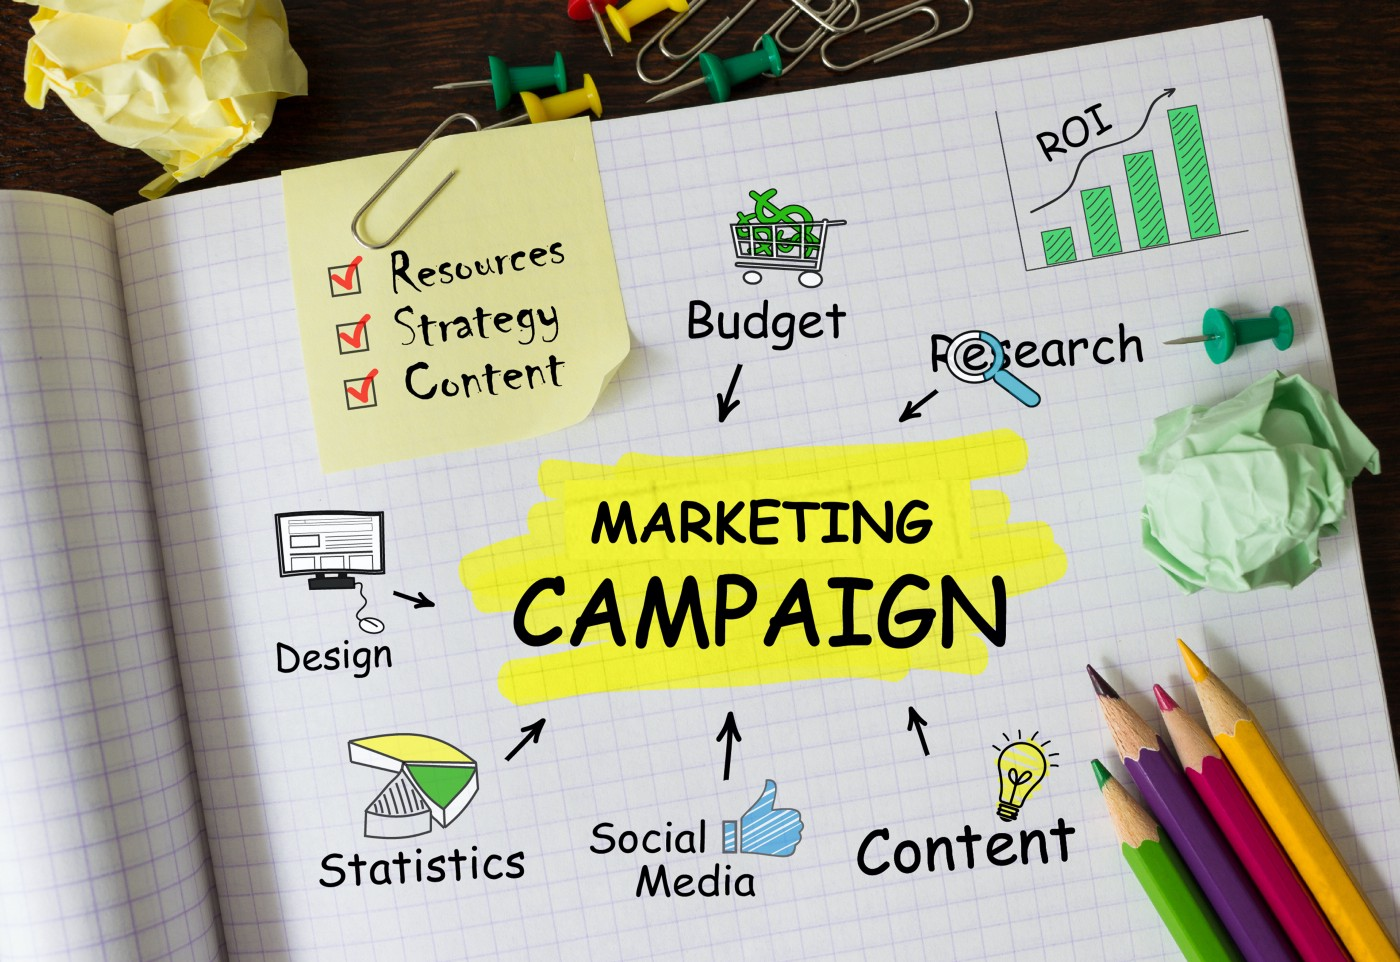

In this article, we'll explore how to use SQL to analyze email campaign performance and extract insights that can help optimize future campaigns.

## Problem Statement

We have 4 tables to study the email performance of a campaign:
- Table A contains the campaign name information
- Table B contains the campaign id delivery performance (who the campaign was sent out to)
- Table C contains the campaign id open performance (who opened the email)
- Table D contains the campaign's click performance (who clicked on any elements in the email)

Sample of what the table structures look like (note: assume this is a snapshot and not the full dataset):

**Table A (Campaign)**

| campaign_name          | campaign_id |
|------------------------|------------|
| Instacash Promo 1      | 112233     |
| Instacash Promo 2      | 112244     |
| RoarMoney Balance 5    | 112259     |


**Table B (Email delivered)**

| campaign_id | delivery_date | user_id |
|-------------|---------------|---------|
| 112233      | 2021-01-01    | a       |
| 112233      | 2021-01-01    | b       |
| 112233      | 2021-01-01    | c       |
| 112244      | 2021-01-05    | d       |
| 112244      | 2021-01-05    | e       |


**Table C (Email Opened)**

| campaign_id | open_date    | user_id |
|-------------|--------------|---------|
| 112233      | 2021-01-03   | a       |
| 112233      | 2021-01-05   | b       |
| 112244      | 2021-01-07   | d       |
| 112244      | 2021-01-10   | e       |


**Table D (Email Link Clicked)**

| campaign_id | click_date   | user_id |
|-------------|--------------|---------|
| 112233      | 2021-01-03   | a       |
| 112244      | 2021-01-11   | e       |

- Table A: campaign_name, campaign_id 
- Table B: campaign_id, delivery_date, user_id 
- Table C: campaign_id, open_date, user_id 
- Table D: campaign_id, click_date, user_id 


## Problem 1

Please find out the number of emails delivered per campaign_id 

- Expected output: 

`campaign_id | delivery_date | # delivers`

## Problem 1.5
Please find out the average open rate (% of people opening the email) and click through rate (% of people clicking/interacting with the email after opening it) relative to the individual campaign & their delivery date.

- Expected output: 

`campaign_id | delivery_date | # delivers | open_rate |click_through_rate`

## Problem 2

How do we gauge the overall performance of the campaign based on product category (Instacash, RoarMoney) and only considering opens and clicks within 3 days from delivery date as successful performance towards the campaign? 

Note: any campaign that is not under Instacash or RoarMoney can be dubbed "Others" 

`campaign_category | # delivers | open_rate | click_through_rate`

## Problem 3

What is the average time between the 2nd and 3rd email for each individual product on an overall level?

`campaign_category | Average Time taken from 2nd to 3rd email`


#### 💡Pause the article for a while and think of the solution before moving to the next paragraphs


### **FULL EXPLANATION ON MEDIUM - [HERE](https://medium.com/@yennhi95zz/understanding-email-campaign-performance-using-sql-a-guide-for-campaign-analysts-6407b9a60f98)**

# ANSWER

### A heads-up!

In this notebook, I use **SQLite** to execute the commands in Jupyter Notebook. 
You can also use SQLite in https://sqliteonline.com/ to execute.

Fo ref: How to use `ipython-sql` in Jupyter Notebook [LINK](https://www.geeksforgeeks.org/how-to-install-ipython-sql-package-in-jupyter-notebook/)

In [1]:
!pip install -q ipython-sql

In [2]:
%load_ext sql
%reload_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
%sql sqlite://

In [4]:
%%sql

-- Use SQLite in https://sqliteonline.com/ to execute the SQL
    
-- create table A
CREATE TABLE table_a (
  campaign_name STRING,
  campaign_id INT64
);

-- insert values into table A
INSERT INTO table_a (campaign_name, campaign_id)
VALUES ('Instacash Promo 1', 112233), ('Instacash Promo 2', 112244), ('RoarMoney Balance 5', 112259);

-- create table B
CREATE TABLE table_b (
  campaign_id INT64,
  delivery_date DATE,
  user_id STRING
);

-- insert values into table B
INSERT INTO table_b (campaign_id, delivery_date, user_id)
VALUES (112233, '2021-01-01', 'a'), (112233, '2021-01-01', 'b'), (112233, '2021-01-01', 'c'), 
       (112244, '2021-01-05', 'd'), (112244, '2021-01-05', 'e');

-- create table C
CREATE TABLE table_c (
  campaign_id INT64,
  open_date DATE,
  user_id STRING
);

-- insert values into table C
INSERT INTO table_c (campaign_id, open_date, user_id)
VALUES (112233, '2021-01-03', 'a'), (112233, '2021-01-05', 'b'), (112244, '2021-01-07', 'd'), 
       (112244, '2021-01-10', 'e');

-- create table D
CREATE TABLE table_d (
  campaign_id INT64,
  click_date DATE,
  user_id STRING
);

-- insert values into table D
INSERT INTO table_d (campaign_id, click_date, user_id)
VALUES (112233, '2021-01-03', 'a'), (112244, '2021-01-11', 'e');


 * sqlite://
Done.
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

In [5]:
%%sql
-- View the tables
SELECT campaign_name, campaign_id FROM table_a;

 * sqlite://
Done.


campaign_name,campaign_id
Instacash Promo 1,112233
Instacash Promo 2,112244
RoarMoney Balance 5,112259


In [6]:
%%sql
-- View the tables
SELECT campaign_id, delivery_date, user_id FROM table_b;


 * sqlite://
Done.


campaign_id,delivery_date,user_id
112233,2021-01-01,a
112233,2021-01-01,b
112233,2021-01-01,c
112244,2021-01-05,d
112244,2021-01-05,e


In [7]:
%%sql
-- View the tables
SELECT campaign_id, open_date, user_id FROM table_c;


 * sqlite://
Done.


campaign_id,open_date,user_id
112233,2021-01-03,a
112233,2021-01-05,b
112244,2021-01-07,d
112244,2021-01-10,e


In [8]:
%%sql
-- View the tables
SELECT campaign_id, click_date, user_id FROM table_d;

 * sqlite://
Done.


campaign_id,click_date,user_id
112233,2021-01-03,a
112244,2021-01-11,e


In [9]:
%%sql
-- Problem 1
-- Please find out the number of emails delivered per campaign_id.
SELECT campaign_id, delivery_date, COUNT(user_id) AS '# delivers'
FROM table_b
GROUP BY campaign_id, delivery_date;

 * sqlite://
Done.


campaign_id,delivery_date,# delivers
112233,2021-01-01,3
112244,2021-01-05,2


In [10]:
%%sql
-- Problem 1.5
-- Please find out the average open rate (% of people opening the email) and click-through rate (% of people clicking/interacting with the email after opening it) relative to the individual campaign & their delivery date.
SELECT b.campaign_id, b.delivery_date, COUNT(DISTINCT b.user_id) AS '# delivers', 
       COUNT(DISTINCT c.user_id) * 100.0 / COUNT(DISTINCT b.user_id) AS open_rate,
       COUNT(DISTINCT d.user_id) * 100.0 / COUNT(DISTINCT c.user_id) AS click_through_rate
FROM table_b b
LEFT JOIN table_c c ON b.campaign_id = c.campaign_id AND b.user_id = c.user_id
LEFT JOIN table_d d ON c.campaign_id = d.campaign_id AND c.user_id = d.user_id
GROUP BY b.campaign_id, b.delivery_date;

 * sqlite://
Done.


campaign_id,delivery_date,# delivers,open_rate,click_through_rate
112233,2021-01-01,3,66.66666666666667,50.0
112244,2021-01-05,2,100.0,50.0


In [11]:
%%sql
-- Problem 2
-- How do we gauge the overall performance of the campaign based on product category (Instacash, RoarMoney) 
-- and only considering opens 
-- and clicks within 3 days from delivery date as successful performance towards the campaign?
SELECT CASE 
         WHEN a.campaign_name LIKE '%Instacash%' THEN 'Instacash'
         WHEN a.campaign_name LIKE '%RoarMoney%' THEN 'RoarMoney'
         ELSE 'Others'
       END AS campaign_category,
       COUNT(DISTINCT b.user_id) AS '# delivers',
       COUNT(DISTINCT c.user_id) * 100.0 / COUNT(DISTINCT b.user_id) AS open_rate,
       COUNT(DISTINCT d.user_id) * 100.0 / COUNT(DISTINCT b.user_id) AS click_through_rate
FROM table_a a
LEFT JOIN table_b b ON a.campaign_id = b.campaign_id
LEFT JOIN table_c c ON b.campaign_id = c.campaign_id AND b.user_id = c.user_id
LEFT JOIN table_d d ON c.campaign_id = d.campaign_id AND c.user_id = d.user_id AND d.click_date <= date(b.delivery_date, '+3 days')
WHERE a.campaign_name LIKE '%Instacash%' OR a.campaign_name LIKE '%RoarMoney%'
GROUP BY campaign_category;

 * sqlite://
Done.


campaign_category,# delivers,open_rate,click_through_rate
Instacash,5,80.0,20.0
RoarMoney,0,None,None


In [12]:
%%sql

-- Problem 3
-- What is the average time 
-- between the 2nd and 3rd email for each individual product on an overall level?

SELECT CASE 
         WHEN a.campaign_name LIKE '%Instacash%' THEN 'Instacash'
         WHEN a.campaign_name LIKE '%RoarMoney%' THEN 'RoarMoney'
         ELSE 'Others'
       END AS campaign_category,
       AVG(JULIANDAY(c2.open_date) - JULIANDAY(c1.open_date)) AS "Average Time taken from 2nd to 3rd email"
FROM table_a a
LEFT JOIN table_b b1 ON a.campaign_id = b1.campaign_id
LEFT JOIN table_b b2 ON a.campaign_id = b2.campaign_id AND b1.delivery_date < b2.delivery_date
LEFT JOIN table_c c1 ON b1.campaign_id = c1.campaign_id AND b1.user_id = c1.user_id
LEFT JOIN table_c c2 ON b2.campaign_id = c2.campaign_id AND b2.user_id = c2.user_id
WHERE c1.open_date IS NOT NULL AND c2.open_date IS NOT NULL
AND (a.campaign_name LIKE '%Instacash%' OR a.campaign_name LIKE '%RoarMoney%')
GROUP BY campaign_category;


 * sqlite://
Done.


campaign_category,Average Time taken from 2nd to 3rd email


# References:
- Github Report - [HERE](https://github.com/yennhi95zz/email-campaign-performance-analysis-with-sql)
- Kaggle Project - [HERE](https://www.kaggle.com/nhiyen/email-campaign-performance-analysis-with-sql)
- Full explanation on [MEDIUM](https://medium.com/@yennhi95zz/understanding-email-campaign-performance-using-sql-a-guide-for-campaign-analysts-6407b9a60f98)